# Лабораторная работа №8 (Проведение исследований моделями обнаружения и распознавания объектов)

## 1.	Выбор начальных условий

In [5]:
!pip install ultralytics matplotlib seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.8 MB/s eta 0:00:00


In [6]:
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


В качестве датасета возьмём COCO128. Это сокращенная версия датасета COCO (Common Objects in Context), содержащая 128 изображений.

Это отличный выбор для быстрого прототипирования из-за малого размера.


## 2.	Создание бейзлайна и оценка качества

In [9]:
def train_baseline(model_size='m', epochs=20, imgsz=640):
    model = YOLO(f'yolov8{model_size}.pt')
    results = model.train(
        data='coco128.yaml',
        epochs=epochs,
        imgsz=imgsz,
        batch=16,
        name=f'yolov8{model_size}_baseline'
    )
    return model, results

Обучим модели семейства YOLOv8 на выбранном датасете (выбраны модели yolov8n, yolov8s, yolov8m):

In [10]:
models = {}
for size in ['n', 's', 'm']:
    print(f"\nTraining YOLOv8{size} baseline...")
    model, results = train_baseline(model_size=size)
    models[size] = {
        'model': model,
        'results': results
    }


Training YOLOv8n baseline...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_baseline2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.4±0.9 ms, read: 450.4±124.7 MB/s, size: 52.5 KB)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_baseline2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_baseline2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.59G      1.156      1.519      1.226        172        640: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        128        929      0.649      0.536      0.613      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.59G      1.209      1.436      1.243        231        640: 100%|██████████| 8/8 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        128        929      0.652      0.558      0.631      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.59G      1.161      1.366      1.252        192        640: 100%|██████████| 8/8 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        128        929      0.647      0.589      0.646      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.59G      1.165      1.311      1.228        215        640: 100%|██████████| 8/8 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]

                   all        128        929       0.67      0.577      0.654      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.59G      1.186      1.315      1.263        236        640: 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        128        929      0.689      0.576      0.672      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       3.6G      1.183       1.29      1.231        253        640: 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        128        929      0.668       0.63      0.686      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       3.6G      1.085      1.208      1.196        282        640: 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]

                   all        128        929      0.683      0.633      0.695      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       3.6G      1.125      1.208      1.205        192        640: 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all        128        929      0.728      0.646      0.717      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       3.6G      1.104      1.111      1.187        180        640: 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        128        929      0.718      0.665       0.72       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       3.6G      1.072      1.132      1.159        180        640: 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        128        929      0.711      0.677      0.725      0.554


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       3.6G      1.158      1.238      1.207        169        640: 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all        128        929      0.755      0.656      0.741       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.61G      1.105      1.178      1.168         95        640: 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]

                   all        128        929      0.739      0.667      0.748      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.61G      1.112      1.133      1.152        129        640: 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        128        929       0.72      0.676      0.753      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.63G      1.084      1.098      1.155         77        640: 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        128        929      0.746      0.655      0.754      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.63G      1.093      1.059      1.155        125        640: 100%|██████████| 8/8 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        128        929      0.728      0.657      0.754      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.65G      1.085      1.038      1.143        105        640: 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        128        929      0.781      0.636      0.758      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.65G       1.05      1.044      1.134        103        640: 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]

                   all        128        929      0.712      0.688       0.76      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.65G      1.026      1.026       1.12        109        640: 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]

                   all        128        929      0.759      0.653      0.755      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.67G      1.073       1.03      1.129        139        640: 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        128        929      0.779      0.663       0.76      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.67G      1.055      1.003      1.132         91        640: 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        128        929      0.772      0.659      0.763      0.582



20 epochs completed in 0.021 hours.
Optimizer stripped from runs/detect/yolov8n_baseline2/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/yolov8n_baseline2/weights/best.pt, 6.5MB

Validating runs/detect/yolov8n_baseline2/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]


                   all        128        929      0.776      0.659      0.759      0.583
                person         61        254      0.909      0.634       0.79      0.583
               bicycle          3          6      0.789      0.333      0.414      0.339
                   car         12         46      0.724      0.239      0.377      0.225
            motorcycle          4          5          1      0.968      0.995      0.876
              airplane          5          6      0.815          1      0.972      0.858
                   bus          5          7      0.849      0.714      0.723      0.673
                 train          3          3      0.724          1      0.995      0.853
                 truck          5         12      0.819        0.5      0.569      0.405
                  boat          2          6      0.617      0.333      0.578      0.367
         traffic light          4         14      0.577      0.143      0.181      0.155
             stop sig

100%|██████████| 21.5M/21.5M [00:00<00:00, 45.1MB/s]

Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_baseline, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

 21                  -1  1   1969152  ultralytics.nn.modules.block.C2f             [768, 512, 1]                 
 22        [15, 18, 21]  1   2147008  ultralytics.nn.modules.head.Detect           [80, [128, 256, 512]]         
Model summary: 129 layers, 11,166,560 parameters, 11,166,544 gradients, 28.8 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1436.4±544.1 MB/s, size: 50.9 KB)


train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 359.6±109.9 MB/s, size: 52.5 KB)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8s_baseline/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_baseline
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.04G       1.04      1.095      1.182        172        640: 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        128        929      0.814      0.675      0.773      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.02G      1.073      1.071      1.181        231        640: 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all        128        929      0.807        0.7      0.788      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.04G      1.028      1.016      1.194        192        640: 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        128        929      0.799      0.712      0.791      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.06G      1.043      0.954      1.163        215        640: 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        128        929      0.777      0.728      0.798       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       5.1G      1.034     0.9437      1.165        236        640: 100%|██████████| 8/8 [00:02<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        128        929      0.752      0.744      0.806      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       5.1G      1.027     0.9386      1.148        253        640: 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]

                   all        128        929      0.819      0.722      0.821      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       5.1G     0.9638      0.841      1.127        282        640: 100%|██████████| 8/8 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        128        929      0.813      0.745      0.824       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.13G     0.9746     0.8598      1.118        192        640: 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        128        929      0.802      0.764       0.83      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.13G     0.9596     0.8025      1.101        180        640: 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all        128        929      0.818      0.767      0.838       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.17G     0.9091      0.798      1.066        180        640: 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        128        929      0.809      0.777       0.84      0.674


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.17G      1.038      1.049      1.124        169        640: 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        128        929      0.878      0.757      0.847      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.17G     0.9611     0.9498      1.072         95        640: 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        128        929      0.895      0.744      0.859      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.17G     0.9729     0.8964      1.066        129        640: 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all        128        929      0.895      0.753      0.862      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.17G     0.9198     0.7832      1.058         77        640: 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        128        929      0.828      0.805      0.865      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       5.2G     0.9192     0.7649      1.046        125        640: 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        128        929      0.826      0.804      0.864      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       5.2G      0.897      0.723      1.035        105        640: 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        128        929      0.825      0.805      0.865       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.24G     0.8723     0.6916      1.026        103        640: 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]

                   all        128        929      0.832      0.802      0.866      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.24G     0.8773     0.7134      1.031        109        640: 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        128        929      0.841      0.798      0.866      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.24G     0.9377     0.7166      1.048        139        640: 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        128        929      0.847        0.8      0.867      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.24G     0.8804      0.664      1.034         91        640: 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        128        929      0.853      0.797      0.868        0.7



20 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/yolov8s_baseline/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/yolov8s_baseline/weights/best.pt, 22.6MB

Validating runs/detect/yolov8s_baseline/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


                   all        128        929      0.853      0.797      0.868      0.699
                person         61        254      0.945      0.752      0.869      0.675
               bicycle          3          6          1      0.528      0.727      0.459
                   car         12         46        0.9      0.393      0.622        0.3
            motorcycle          4          5      0.885          1      0.995      0.864
              airplane          5          6      0.946          1      0.995      0.904
                   bus          5          7          1      0.928      0.995      0.895
                 train          3          3      0.933          1      0.995       0.94
                 truck          5         12      0.872        0.5      0.595      0.435
                  boat          2          6      0.928      0.667        0.8       0.52
         traffic light          4         14      0.908      0.429      0.483      0.297
             stop sig

100%|██████████| 49.7M/49.7M [00:00<00:00, 566MB/s]


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_baseline, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 367.0±100.0 MB/s, size: 52.5 KB)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8m_baseline/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8m_baseline
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.84G     0.9441     0.9748      1.158        172        640: 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        128        929      0.749      0.711      0.786      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      7.09G      1.005      0.945      1.165        231        640: 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        128        929      0.789      0.734      0.811      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      7.04G     0.9427     0.8555       1.17        192        640: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        128        929      0.781      0.757      0.829       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      7.15G     0.9466     0.8274      1.139        215        640: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        128        929      0.798      0.759      0.841      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      7.15G     0.9483     0.7737      1.142        236        640: 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        128        929      0.849      0.761      0.855      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      7.11G     0.9342      0.793      1.123        253        640: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        128        929      0.878      0.761      0.874      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      7.17G     0.8502     0.7411      1.089        282        640: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        128        929      0.824      0.811       0.88      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      7.13G     0.8677      0.695      1.092        192        640: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        128        929      0.901      0.788      0.883      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      7.09G     0.8483     0.6503      1.073        180        640: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        128        929      0.876      0.833       0.89      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      7.07G     0.8286     0.6535      1.048        180        640: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        128        929      0.901      0.826      0.894      0.734


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      7.11G     0.8377     0.6209      1.034        169        640: 100%|██████████| 8/8 [00:05<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        128        929       0.91      0.821      0.897      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      7.06G     0.7852       0.57      1.005         95        640: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        128        929      0.908      0.824      0.898      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.09G     0.7747      0.565     0.9937        129        640: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        128        929      0.882      0.841      0.903      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.03G      0.776     0.5496     0.9969         77        640: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        128        929      0.908      0.843      0.905      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.03G     0.7545     0.5359     0.9838        125        640: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        128        929      0.912      0.846      0.907      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.06G     0.7498     0.5158     0.9872        105        640: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        128        929      0.912       0.85      0.911      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.02G     0.7271     0.4906     0.9831        103        640: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        128        929      0.926      0.844      0.911      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         7G     0.7321     0.5029     0.9812        109        640: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        128        929       0.93      0.846      0.916      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      7.02G     0.7665     0.5326     0.9932        139        640: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        128        929      0.929      0.848      0.916      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      7.03G     0.7201     0.4798     0.9732         91        640: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        128        929       0.93      0.847      0.916      0.757



20 epochs completed in 0.142 hours.
Optimizer stripped from runs/detect/yolov8m_baseline/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/yolov8m_baseline/weights/best.pt, 52.1MB

Validating runs/detect/yolov8m_baseline/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


                   all        128        929      0.929      0.848      0.916      0.756
                person         61        254      0.993      0.772      0.921      0.739
               bicycle          3          6          1      0.603      0.812      0.639
                   car         12         46      0.947      0.413      0.657      0.371
            motorcycle          4          5      0.925          1      0.995      0.901
              airplane          5          6      0.946          1      0.995      0.935
                   bus          5          7      0.994          1      0.995      0.925
                 train          3          3      0.891          1      0.995      0.995
                 truck          5         12      0.858        0.5       0.77      0.587
                  boat          2          6          1      0.613      0.813      0.636
         traffic light          4         14          1      0.439      0.586      0.363
             stop sig

Вычислим метрики для каждой эпохи каждой модели, и проведём сравнительный анализ

In [16]:
def evaluate_model(model, model_name):
    metrics = model.val(
        data='coco128.yaml',
        name=f'{model_name}_eval'
    )
    return metrics

# Собираем метрики
baseline_metrics = {}
for size in ['n', 's', 'm']:
    print(f"\nEvaluating YOLOv8{size}...")
    metrics = evaluate_model(models[size]['model'], f'yolov8{size}_baseline')

    # Извлекаем метрики через правильные атрибуты
    baseline_metrics[size] = {
        'mAP50': metrics.box.map50,
        'mAP50_95': metrics.box.map,
        'precision': metrics.box.p[0],  # Precision для IoU=0.5
        'recall': metrics.box.r[0],     # Recall для IoU=0.5
        'f1': 2 * (metrics.box.p[0] * metrics.box.r[0]) / (metrics.box.p[0] + metrics.box.r[0] + 1e-16)
    }


Evaluating YOLOv8n...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1639.9±783.8 MB/s, size: 50.8 KB)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.78it/s]


                   all        128        929      0.754      0.687       0.76      0.584
                person         61        254      0.889      0.664      0.791      0.588
               bicycle          3          6      0.745      0.333      0.471       0.39
                   car         12         46      0.686      0.239      0.372      0.219
            motorcycle          4          5          1      0.983      0.995      0.876
              airplane          5          6      0.805          1      0.972      0.858
                   bus          5          7      0.834      0.714      0.723       0.69
                 train          3          3      0.706          1      0.995      0.853
                 truck          5         12      0.754        0.5      0.568      0.405
                  boat          2          6      0.557      0.333      0.603      0.342
         traffic light          4         14       0.52      0.143      0.185       0.14
             stop sig

val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


                   all        128        929      0.873      0.785      0.866      0.699
                person         61        254      0.963      0.722      0.869      0.678
               bicycle          3          6          1       0.56      0.723      0.431
                   car         12         46      0.943       0.37      0.617        0.3
            motorcycle          4          5        0.9          1      0.995      0.864
              airplane          5          6      0.956          1      0.995      0.904
                   bus          5          7          1      0.902      0.995      0.874
                 train          3          3      0.954          1      0.995       0.94
                 truck          5         12      0.887        0.5      0.595      0.435
                  boat          2          6      0.973      0.667      0.783      0.508
         traffic light          4         14          1      0.423      0.483      0.287
             stop sig

val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


                   all        128        929      0.924      0.848      0.911      0.759
                person         61        254      0.982      0.772      0.919      0.739
               bicycle          3          6          1      0.612      0.812      0.639
                   car         12         46      0.927      0.413      0.658      0.371
            motorcycle          4          5      0.921          1      0.995      0.901
              airplane          5          6      0.943          1      0.995      0.935
                   bus          5          7      0.983          1      0.995      0.925
                 train          3          3      0.886          1      0.995      0.995
                 truck          5         12      0.847        0.5       0.77      0.586
                  boat          2          6          1      0.629      0.778       0.59
         traffic light          4         14          1      0.443      0.587      0.363
             stop sig

In [19]:
import pandas as pd

def plot_training_results(model_size):
    results_path = f'runs/detect/yolov8{model_size}_baseline/results.csv'
    results = pd.read_csv(results_path)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(results['epoch'], results['train/box_loss'], label='Train Loss')
    plt.plot(results['epoch'], results['val/box_loss'], label='Val Loss')
    plt.title('Bounding Box Loss')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision')
    plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall')
    plt.title('Precision/Recall')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@0.5')
    plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
    plt.title('mAP Metrics')
    plt.legend()

    plt.tight_layout()
    plt.show()


Training Results for YOLOv8n:


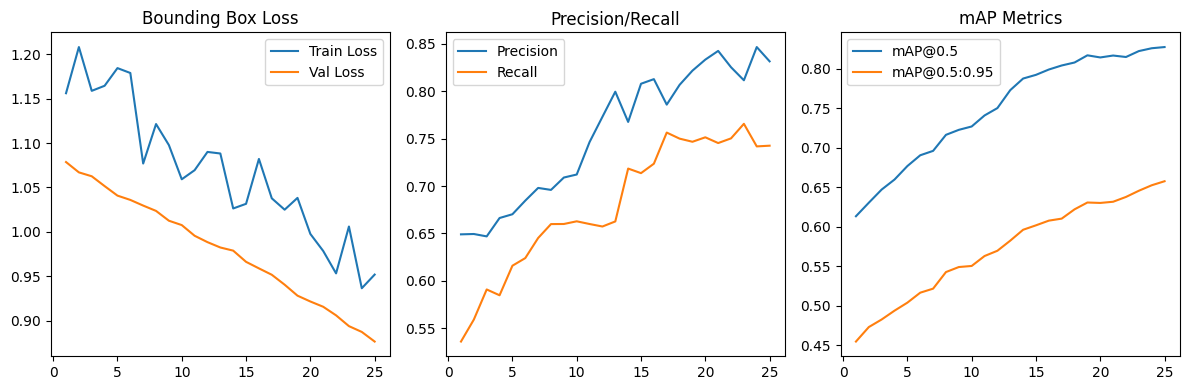


Training Results for YOLOv8s:


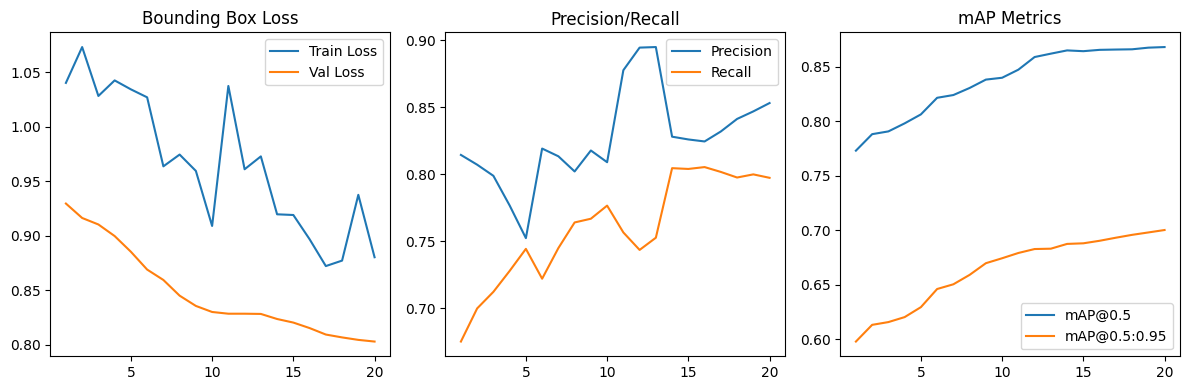


Training Results for YOLOv8m:


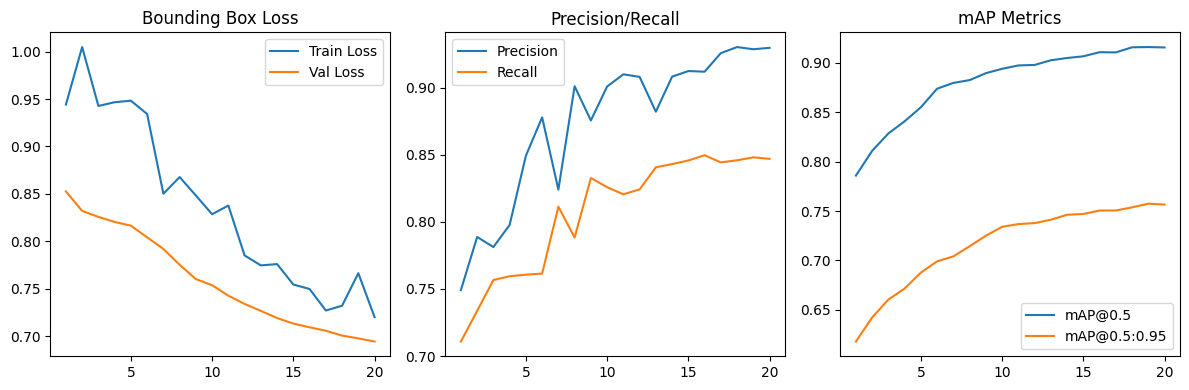

In [20]:
for size in ['n', 's', 'm']:
    print(f"\nTraining Results for YOLOv8{size}:")
    plot_training_results(size)

Как можно видеть, лучше всех справилась модель yolov8m, а потому будем использовать её на улучшенном бейзлайне

## 3.	Улучшение бейзлайна

Улучшим бейзлайн, оптимизировав параметры модели и обучения, а также добавив аугментации данных

In [22]:
def train_improved(model_size='m', epochs=30, imgsz=800):
    model = YOLO(f'yolov8{model_size}.pt')
    results = model.train(
        data='coco128.yaml',
        epochs=epochs,
        imgsz=imgsz,
        batch=8,
        augment=True,
        lr0=0.001,
        hsv_h=0.5,
        hsv_s=0.5,
        hsv_v=0.5,
        degrees=45,
        translate=0.2,
        scale=0.5,
        name=f'yolov8{model_size}_improved'
    )
    return model, results

print("\nTraining Improved YOLOv8m...")
improved_model, improved_results = train_improved()


Training Improved YOLOv8m...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=45, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.5, hsv_s=0.5, hsv_v=0.5, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_improved2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.3±0.6 ms, read: 296.7±123.7 MB/s, size: 52.5 KB)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8m_improved2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8m_improved2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.07G      2.363      2.481       2.56         92        800: 100%|██████████| 16/16 [00:08<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.07it/s]

                   all        128        929      0.724      0.706      0.774      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.51G      2.276      2.246      2.315        122        800: 100%|██████████| 16/16 [00:07<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]

                   all        128        929      0.785      0.673      0.763      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.58G      1.902      1.975      1.994         58        800: 100%|██████████| 16/16 [00:07<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all        128        929        0.7      0.722      0.755      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.65G      1.876      1.906      1.952         90        800: 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        128        929      0.684      0.663      0.711      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.65G      1.818       1.82      1.894         82        800: 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]

                   all        128        929      0.713      0.602      0.685      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.05G      1.727      1.765      1.854        147        800: 100%|██████████| 16/16 [00:07<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]

                   all        128        929      0.715       0.63      0.696      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.05G      1.736      1.642       1.78        116        800: 100%|██████████| 16/16 [00:07<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]

                   all        128        929      0.739      0.662      0.724      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.05G      1.668      1.688      1.727         70        800: 100%|██████████| 16/16 [00:07<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        128        929      0.747       0.67      0.728      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.05G       1.65       1.57      1.716         81        800: 100%|██████████| 16/16 [00:07<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]

                   all        128        929      0.767      0.676      0.758      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.05G      1.637      1.494      1.677         86        800: 100%|██████████| 16/16 [00:07<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        128        929      0.739      0.703       0.77      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.05G      1.594       1.41      1.629        160        800: 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        128        929      0.775      0.712      0.792      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.05G      1.541      1.366      1.654         93        800: 100%|██████████| 16/16 [00:07<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        128        929      0.761      0.743      0.814      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.05G      1.534      1.337      1.666        115        800: 100%|██████████| 16/16 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]

                   all        128        929      0.821      0.745      0.826      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.05G      1.531       1.34      1.616        152        800: 100%|██████████| 16/16 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]

                   all        128        929      0.792      0.784      0.837      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.05G      1.611      1.394      1.648        120        800: 100%|██████████| 16/16 [00:07<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        128        929       0.83       0.79      0.851      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.05G      1.521      1.373      1.647        131        800: 100%|██████████| 16/16 [00:07<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        128        929      0.816       0.81      0.859      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.05G      1.546      1.332      1.635        126        800: 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.30it/s]

                   all        128        929      0.839      0.793      0.859      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.05G      1.446      1.219      1.629         69        800: 100%|██████████| 16/16 [00:07<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.11it/s]

                   all        128        929      0.802      0.821      0.859      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.08G      1.459      1.215       1.62         97        800: 100%|██████████| 16/16 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        128        929      0.801      0.816      0.854        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.15G      1.429      1.248      1.603        153        800: 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        128        929      0.827      0.807       0.86      0.417


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.21G      1.442      1.214      1.641         68        800: 100%|██████████| 16/16 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.07it/s]

                   all        128        929      0.826      0.815      0.861      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.21G      1.458       1.19      1.611         39        800: 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        128        929      0.826      0.815      0.861       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.21G      1.397      1.098      1.613         79        800: 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        128        929      0.812      0.822      0.857      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.21G      1.413      1.084      1.582         50        800: 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        128        929      0.829      0.806      0.858      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.21G      1.429      1.024      1.595         79        800: 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        128        929      0.827      0.799      0.853      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.21G      1.414      1.075      1.614         58        800: 100%|██████████| 16/16 [00:07<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        128        929      0.828        0.8      0.853      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.21G      1.394     0.9981      1.537         53        800: 100%|██████████| 16/16 [00:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]

                   all        128        929      0.827        0.8      0.856      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.28G      1.389      1.034      1.577         32        800: 100%|██████████| 16/16 [00:07<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        128        929      0.838      0.793      0.857      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.35G      1.389      1.013      1.567        106        800: 100%|██████████| 16/16 [00:07<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        128        929      0.842      0.794      0.858      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.31G      1.344     0.9616      1.526         42        800: 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]

                   all        128        929       0.83      0.799      0.857      0.439



30 epochs completed in 0.127 hours.
Optimizer stripped from runs/detect/yolov8m_improved2/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/yolov8m_improved2/weights/best.pt, 52.1MB

Validating runs/detect/yolov8m_improved2/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]


                   all        128        929       0.77      0.704      0.794       0.63
                person         61        254      0.891      0.681      0.847      0.648
               bicycle          3          6      0.728      0.333      0.722      0.553
                   car         12         46      0.893      0.364      0.622      0.332
            motorcycle          4          5      0.798          1      0.962      0.771
              airplane          5          6      0.924          1      0.995      0.914
                   bus          5          7      0.768      0.714      0.846       0.74
                 train          3          3      0.859          1      0.995      0.962
                 truck          5         12      0.696        0.5      0.595      0.384
                  boat          2          6      0.853        0.5      0.779      0.542
         traffic light          4         14          1      0.392       0.55      0.335
             stop sig

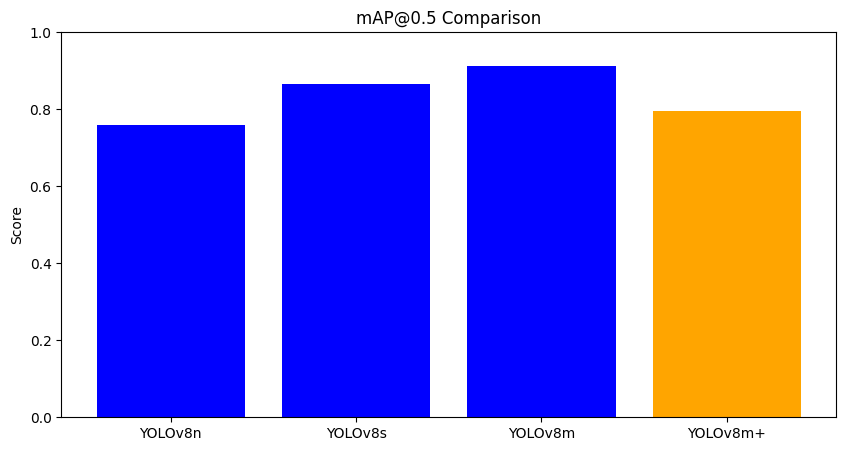

In [23]:
labels = ['YOLOv8n', 'YOLOv8s', 'YOLOv8m', 'YOLOv8m+']
map50 = [baseline_metrics['n']['mAP50'],
         baseline_metrics['s']['mAP50'],
         baseline_metrics['m']['mAP50'],
         improved_model.metrics.box.map50]

plt.figure(figsize=(10, 5))
plt.bar(labels, map50, color=['blue', 'blue', 'blue', 'orange'])
plt.title('mAP@0.5 Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

In [27]:
metrics_df = pd.DataFrame({
    'Model': labels,
    'mAP50': map50,
})
print("\nFinal Metrics Table:")
print(metrics_df)


Final Metrics Table:
      Model     mAP50
0   YOLOv8n  0.759607
1   YOLOv8s  0.865930
2   YOLOv8m  0.911378
3  YOLOv8m+  0.794445


## Вывод

По результатам работы видно, что улучшения бейзлайна выбранным образом негативно повлияло на показатели модели, немного понизив показатели метрики mAP@0.5. Вероятно, следовало менять разные параметры модели по отдельности, чтобы найти те изменения, которые влияли бы положительно. Стоит, однако, отметить, что в любом случае библиотечные модели показали хорошие результаты и выдали достаточно высокие показатели выбранной метрики.

Таблица с результатами:


Final Metrics Table:
      Model     mAP50
0   YOLOv8n  0.759607
1   YOLOv8s  0.865930
2   YOLOv8m  0.911378
3  YOLOv8m+  0.794445

| Модель                           | mAP@0.5      
|----------------------------------|----------|
| YOLOv8n          |  0.759607  |
| YOLOv8s   |    0.865930  |
| YOLOv8m                      |  0.911378  |
| YOLOv8m (улучшенный бейзлайн) |  0.794445  |